In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
# Load the diabetes dataset
boston = datasets.load_boston()
f, axarr = plt.subplots(5,2, sharex=True, sharey=True,figsize=(12,12))
for i in range(0,5):
    for j in range(0,2):
        # Use only one feature
        boston_X = boston.data[:, np.newaxis, i*2+j]
   
        
        # Split the data into training/testing sets
        boston_X_train = boston_X[:-20]
        boston_X_test = boston_X[-20:]
        
        # Split the targets into training/testing sets
        boston_y_train = boston.target[:-20]
        boston_y_test = boston.target[-20:]
        
        # Create linear regression object
        regr = linear_model.LinearRegression()
        
        # Train the model using the training sets
        regr.fit(boston_X_train, boston_y_train)
        
        # The coefficients
        print('Coefficients: \n', regr.coef_)
        # The mean square error
        print("Residual sum of squares: %.2f"
              % np.mean((regr.predict(boston_X_test) - boston_y_test) ** 2))
        # Explained variance score: 1 is perfect prediction
        print('Variance score: %.2f' % regr.score(boston_X_test, boston_y_test))
        
        # Plot outputs
        axarr[i,j].scatter(boston_X_test, boston_y_test,  color='red')
        axarr[i,j].plot(boston_X_test, regr.predict(boston_X_test), color='blue', linewidth=1)
        
plt.show()

Coefficients: 
 [-0.42498723]
Residual sum of squares: 56.18
Variance score: -1.40
Coefficients: 
 [0.13992373]
Residual sum of squares: 30.56
Variance score: -0.31
Coefficients: 
 [-0.65457086]
Residual sum of squares: 18.56
Variance score: 0.21
Coefficients: 
 [6.18101996]
Residual sum of squares: 38.50
Variance score: -0.65
Coefficients: 
 [-33.50740648]
Residual sum of squares: 31.06
Variance score: -0.33
Coefficients: 
 [9.126359]
Residual sum of squares: 18.73
Variance score: 0.20
Coefficients: 
 [-0.12125016]
Residual sum of squares: 27.00
Variance score: -0.15
Coefficients: 
 [1.04990962]
Residual sum of squares: 29.56
Variance score: -0.26
Coefficients: 
 [-0.42430923]
Residual sum of squares: 67.82
Variance score: -1.90
Coefficients: 
 [-0.02580034]
Residual sum of squares: 27.40
Variance score: -0.17


<Figure size 1200x1200 with 10 Axes>

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bra

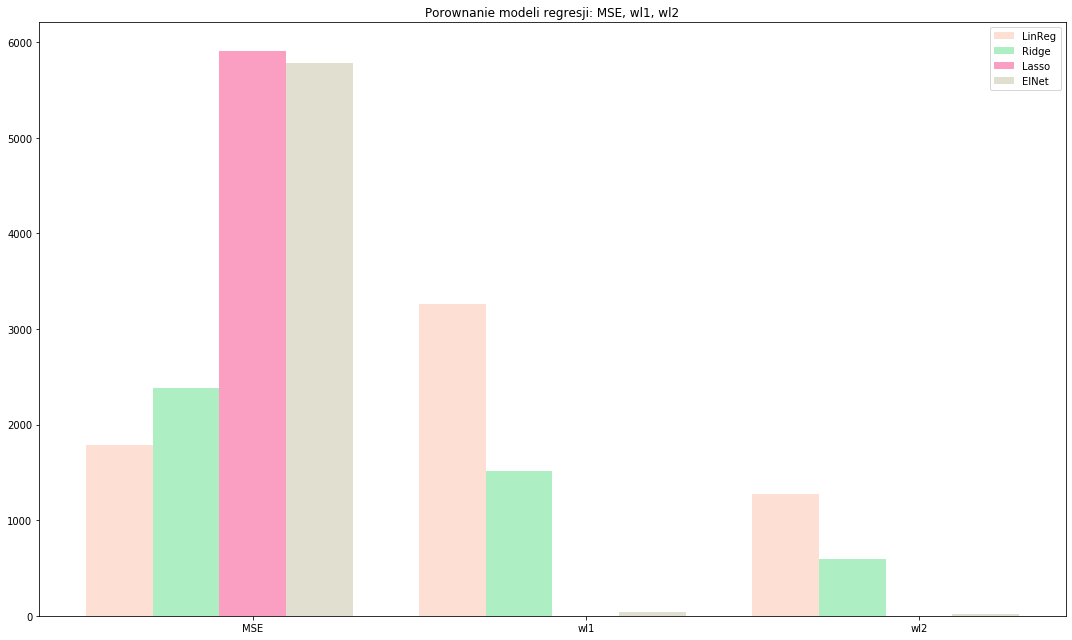

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model as linm

# Reggression models
# http://scikit-learn.org/stable/modules/linear_model.html

# Load the diabetes dataset
diabetes = datasets.load_diabetes()
# print description
print(diabetes.DESCR)
# get the data
diabetes_X = diabetes.data
diabetes_Y = diabetes.target
# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-50]
diabetes_X_test = diabetes_X[-50:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes_Y[:-50]
diabetes_y_test = diabetes_Y[-50:]

regressors = {}
regressors['LinReg'] =linm.LinearRegression()
regressors['Ridge'] = linm.Ridge(alpha = .5)
regressors['Lasso'] = linm.Lasso(alpha = 5.1)
regressors['ElNet'] =linm.ElasticNet(alpha = .5, l1_ratio=0.5)

fit_results={}


for key in regressors:
    # Train the model using the training sets
    regr = regressors[key]
    regr.fit(diabetes_X_train, diabetes_y_train)
    # mean square error
    mse = np.mean((regr.predict(diabetes_X_test) - diabetes_y_test) ** 2)
    w = regr.coef_
    # l1 norm
    wl1 = np.sum(np.abs(w))
    # l2 norm
    wl2 = np.sqrt(np.sum(w**2))
    fit_results[key]= { 'mse': mse, 'wl2': wl2, 'wl1': wl1, 'w': w}
    print("{}\n----------\n  mse={}\n  wl1={}\n  wl2={}\n  w={}\n ".format(key,mse,wl1,wl2,w))
    
groups = 3
index = np.arange(groups)
bar_width = .2
opacity = 0.4

fig, ax = plt.subplots(figsize=(15,9))

t=0
for key in regressors:
    results = fit_results[key]
    res_val = (results['mse'],results['wl1'],results['wl2'])
    plt.bar(index+ bar_width*t, res_val, bar_width,
                 alpha=opacity,
                 color=np.random.rand(1,3),
                 label=key)
    t+=1

#plt.xlabel('Modele regresji')
plt.title('Porownanie modeli regresji: MSE, wl1, wl2')
plt.xticks(index + (t-2)*bar_width, ('MSE', 'wl1', 'wl2'))
plt.legend()

plt.tight_layout()
plt.show()

In [3]:
import numpy as np
import random
rand_X = np.array([random.randint(1,100) for _ in range(100)]).reshape(-1, 1)
rand_y = np.array([random.randint(1,100) for _ in range(100)]).reshape(-1, 1)

Coefficients: 
 [[0.04339976]]
Residual sum of squares: 1183.44
Variance score: -0.25
Coefficients: 
 [[0.04339976]]
Residual sum of squares: 1183.44
Variance score: -0.25
Coefficients: 
 [[0.04339976]]
Residual sum of squares: 1183.44
Variance score: -0.25
Coefficients: 
 [[0.04339976]]
Residual sum of squares: 1183.44
Variance score: -0.25
Coefficients: 
 [[0.04339976]]
Residual sum of squares: 1183.44
Variance score: -0.25
Coefficients: 
 [[0.04339976]]
Residual sum of squares: 1183.44
Variance score: -0.25
Coefficients: 
 [[0.04339976]]
Residual sum of squares: 1183.44
Variance score: -0.25
Coefficients: 
 [[0.04339976]]
Residual sum of squares: 1183.44
Variance score: -0.25
Coefficients: 
 [[0.04339976]]
Residual sum of squares: 1183.44
Variance score: -0.25
Coefficients: 
 [[0.04339976]]
Residual sum of squares: 1183.44
Variance score: -0.25


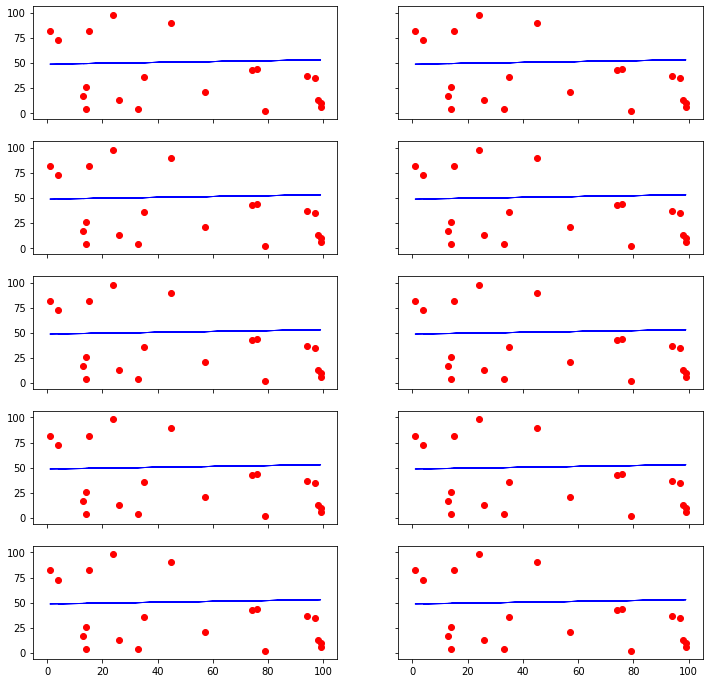

In [4]:
# Load the diabetes dataset
boston = datasets.load_boston()
f, axarr = plt.subplots(5,2, sharex=True, sharey=True,figsize=(12,12))
for i in range(0,5):
    for j in range(0,2):
      
        
        # Split the data into training/testing sets
        rand_X_train = rand_X[:-20]
        rand_X_test = rand_X[-20:]
        
        # Split the targets into training/testing sets
        rand_y_train = rand_y[:-20]
        rand_y_test = rand_y[-20:]
        
        # Create linear regression object
        regr = linear_model.LinearRegression()
        
        # Train the model using the training sets
        regr.fit(rand_X_train, rand_y_train)
        
        # The coefficients
        print('Coefficients: \n', regr.coef_)
        # The mean square error
        print("Residual sum of squares: %.2f"
              % np.mean((regr.predict(rand_X_test) - rand_y_test) ** 2))
        # Explained variance score: 1 is perfect prediction
        print('Variance score: %.2f' % regr.score(rand_X_test, rand_y_test))
        
        # Plot outputs
        axarr[i,j].scatter(rand_X_test, rand_y_test,  color='red')
        axarr[i,j].plot(rand_X_test, regr.predict(rand_X_test), color='blue', linewidth=1)
        
plt.show()

LinReg
----------
  mse=885.661309806601
  wl1=0.03155158337988228
  wl2=0.03155158337988228
  w=[[-0.03155158]]
 
Ridge
----------
  mse=885.6613487727233
  wl1=0.031551244454470245
  wl2=0.031551244454470245
  w=[[-0.03155124]]
 
Lasso
----------
  mse=891.1626956251754
  wl1=0.026073131955484885
  wl2=0.026073131955484885
  w=[-0.02607313]
 
ElNet
----------
  mse=891.4951087844477
  wl1=0.03127463298860572
  wl2=0.03127463298860572
  w=[-0.03127463]
 


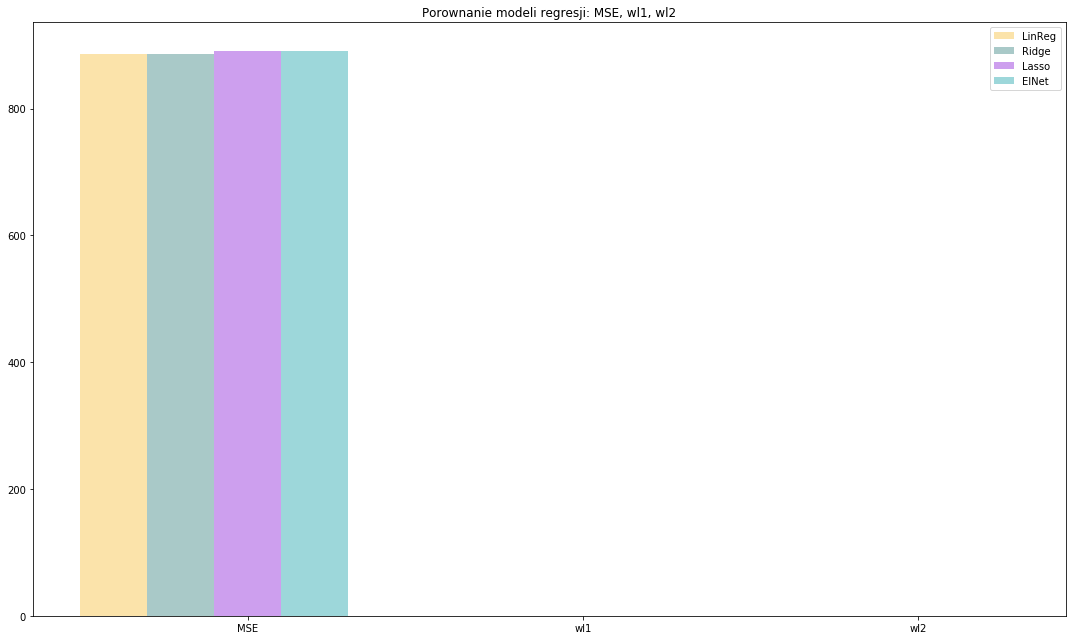

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model as linm

# Reggression models
# http://scikit-learn.org/stable/modules/linear_model.html


# Split the data into training/testing sets
rand_X_train = rand_X[:-50]
rand_X_test = rand_X[-50:]


# Split the targets into training/testing sets
rand_y_train = rand_y[:-50]
rand_y_test = rand_y[-50:]

regressors = {}
regressors['LinReg'] =linm.LinearRegression()
regressors['Ridge'] = linm.Ridge(alpha = .5)
regressors['Lasso'] = linm.Lasso(alpha = 5.1)
regressors['ElNet'] =linm.ElasticNet(alpha = .5, l1_ratio=0.5)

fit_results={}


for key in regressors:
    # Train the model using the training sets
    regr = regressors[key]
    regr.fit(rand_X_train, rand_y_train)
    # mean square error
    mse = np.mean((regr.predict(rand_X_test) - rand_y_test) ** 2)
    w = regr.coef_
    # l1 norm
    wl1 = np.sum(np.abs(w))
    # l2 norm
    wl2 = np.sqrt(np.sum(w**2))
    fit_results[key]= { 'mse': mse, 'wl2': wl2, 'wl1': wl1, 'w': w}
    print("{}\n----------\n  mse={}\n  wl1={}\n  wl2={}\n  w={}\n ".format(key,mse,wl1,wl2,w))
    
groups = 3
index = np.arange(groups)
bar_width = .2
opacity = 0.4

fig, ax = plt.subplots(figsize=(15,9))

t=0
for key in regressors:
    results = fit_results[key]
    res_val = (results['mse'],results['wl1'],results['wl2'])
    plt.bar(index+ bar_width*t, res_val, bar_width,
                 alpha=opacity,
                 color=np.random.rand(1,3),
                 label=key)
    t+=1

#plt.xlabel('Modele regresji')
plt.title('Porownanie modeli regresji: MSE, wl1, wl2')
plt.xticks(index + (t-2)*bar_width, ('MSE', 'wl1', 'wl2'))
plt.legend()

plt.tight_layout()
plt.show()

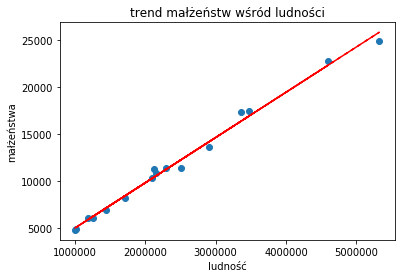

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
csv = pd.read_csv('lud.csv')
data = csv[['ludnosc', 'malzenstwa']]
x = data['ludnosc']
y = data['malzenstwa']
plt.scatter(x, y)

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.xlabel('ludność')
plt.ylabel('małżeństwa')
plt.title('trend małżeństw wśród ludności')

plt.show()

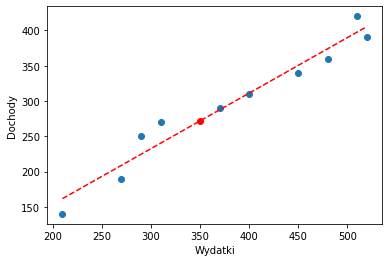

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
csv = pd.read_csv('kas.csv')
data = csv[['Wydatki', 'Dochody']]
y = data['Wydatki']
x = data['Dochody']
plt.scatter(x, y)

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,0.7860988*x - 3.503636,"r--")
w=350
plt.plot([w],[0.7860988*w-3.503636], 'ro')
plt.xlabel('Wydatki')
plt.ylabel('Dochody')


plt.show()